In [10]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import numpy as np

In [11]:
le = preprocessing.LabelEncoder()

# Import data and preprocess
school_data = pd.read_csv('school profiles.csv')
for column_name in school_data.columns:
        if school_data[column_name].dtype == object:
            school_data[column_name] = le.fit_transform(school_data[column_name])
        else:
            pass

In [12]:

X = school_data.drop(columns=['School'])
y = school_data['School']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
predictions = dt_model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.9583333333333334

In [144]:
# predictions = model.predict([[1, 9, 5]])
# le.inverse_transform(predictions)

In [48]:
joblib.dump(dt_model, 'school recommender.joblib')

['school recommender.joblib']

In [49]:
joblib.dump(le, 'label_encoder.joblib')

['label_encoder.joblib']

In [14]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [50]:
accuracy_score(y_test, predictions)

1.0

In [51]:
confusion_matrix(y_test, predictions)

array([[26,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 32]], dtype=int64)

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00        32

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



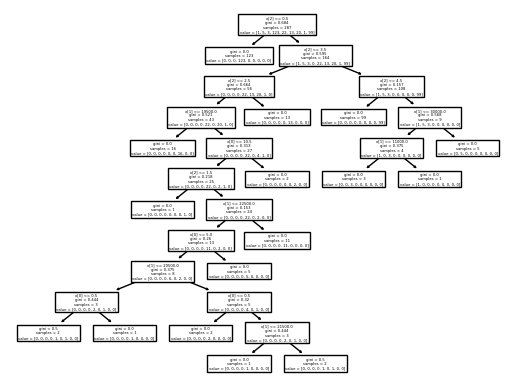

In [53]:
tree.plot_tree(dt_model)
tree.export_graphviz(dt_model, out_file='dt_plot.dot',
                     feature_names=X.columns,
                     class_names=le.classes_,
                     filled=True,
                     rounded=True,
                     label='all')

In [43]:
school_data

,Course,Tuition Fee,Location,School
0,1,47000,5,1
1,0,47000,5,1
2,10,47000,5,1
3,9,38000,5,1
4,8,53000,5,1
...,...,...,...,...
354,3,59000,4,8
355,3,60000,4,8
356,1,0,6,2
357,0,0,6,2


C:\Users\wowha\OneDrive\Desktop\SeeKampus Flask\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but DecisionTreeClassifier is expecting 4 features as input.

In [14]:
probabilities = dt_model.predict_proba([[5, 22, 6]])

# Get the top 3 classes (schools) for each data point
top_5 = np.argsort(-probabilities, axis=1)[:, :100]

# Flatten the array
top_5_flat = top_5.flatten()


recommended_schools = le.inverse_transform(top_5_flat).tolist()
top_5_flat


C:\Users\wowha\OneDrive\Desktop\SeeKampus Flask\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2, 0, 1, 3, 4, 5, 6, 7, 8], dtype=int64)